In [1]:
using Plots, ComplexPhasePortrait, ApproxFun
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes



# Lecture 8: Functions with branch cuts



We now discuss functions with branch cuts

1. $\log z$ with a cut on $(-\infty,0]$
2. $z^\alpha$ with a cut on $(-\infty,0]$
3. $\sqrt{z-1}\sqrt{z+1}$ with a cut on $[-1,1]$
4. $\rm{sign}(|z|-1)$ with a cut on the unit circle.

This is a step towards a Cauchy integral theorem on cuts, for recovering a holomorphic function from its behaviour on a cut.

1. Complex logarithm
2. Algebraic powers
3. Inferred analyticity

We begin with $\log z$. 

## Complex logarithm



**Definition (Complex Logarithm)**
$$\log z = \int_1^z {1 \over \zeta} d\zeta$$
where the integral is understood to be on a straight line segment, that is
$$\log z = \int_{\gamma_z} {1 \over \zeta} d\zeta$$
where
$\gamma_z(t) = 1 + (z-1)t$ for $0 \leq t \leq 1$.

_Demonstration_ this shows the integral path for a point $z$. We see how the path avoids the pole of $\zeta^{-1}$ at the origin:

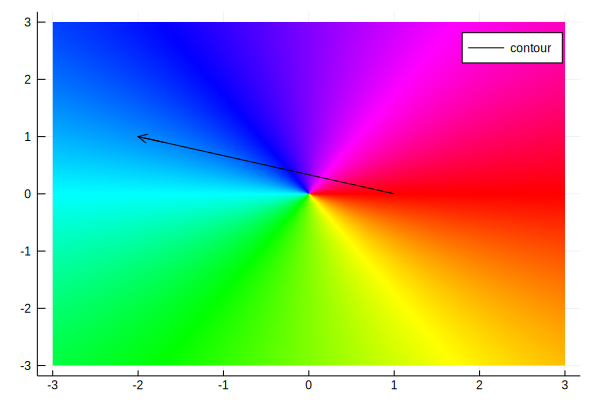

In [2]:
z = -2 + 1.0im
phaseplot(-3..3, -3..3, ζ -> 1/ζ)
t = 0:0.1:1
γ = 1 .+ (z-1)*t
plot!(real.(γ), imag.(γ); color=:black, label="contour", arrow=true)

This is well-defined apart from $z \in (-\infty,0]$, where there is a pole on the contour. This induces a _branch cut_: a jump in the value of the function. 

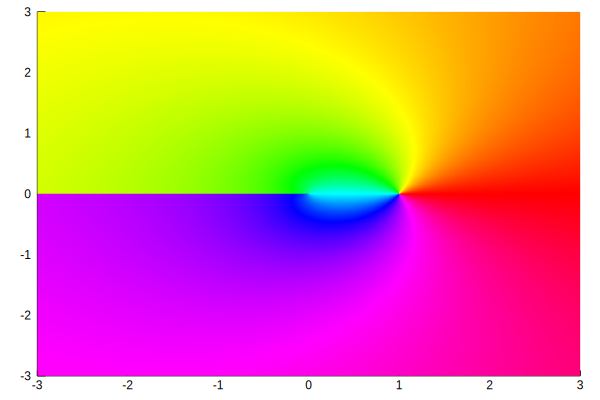

In [3]:
phaseplot(-3..3, -3..3, z -> log(z))

We see that the limits from above and below exist: we can define
$$
\begin{align*}
\log_+ x &= \lim_{\epsilon \rightarrow 0^+} \log(x+\I \epsilon) \\
\log_- x &= \lim_{\epsilon \rightarrow 0^+} \log(x-\I \epsilon)
\end{align*}
$$
and calculate their values via:

In [4]:
log(-1+0.0im), log(-1-0.0im)

(0.0 + 3.141592653589793im, 0.0 - 3.141592653589793im)

By deformation, the value of the integrals is independent of the path: here we calculate the integral on an arc:

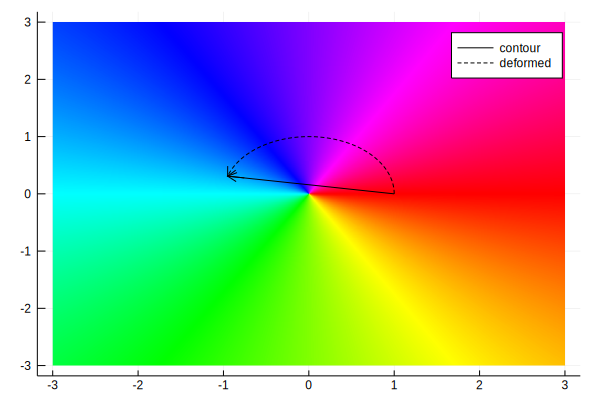

In [5]:
θ = range(0, stop=0.9π, length=100)
a = exp.(im*θ)

z = exp(0.9*π*im)

γ = 1 .+ (z-1)*t
phaseplot(-3..3, -3..3, ζ -> 1/ζ)
plot!(real.(γ), imag.(γ); color=:black, label="contour", arrow=true)
plot!(real.(a), imag.(a), color=:black, linestyle=:dash, label="deformed", arrow=true)

This works all the way to the negative real axis. Here we calculate $\log_\pm 1$ using integrals over half circles:

In [6]:
sum(Fun(ζ -> 1/ζ, Arc(0.,1.,(0.,π)))),
sum(Fun(ζ -> 1/ζ, Arc(0.,1.,(0.,-π))))

(9.692284352069077e-17 + 3.141592653589793im, 9.692284352069077e-17 - 3.141592653589793im)

Combining the two contours we have
$$
\log_+(-1) - \log_-(-1) = \oint {\D\zeta \over \zeta}  = 2 \pi \I
$$

In [7]:
log(-1.0+0im) - log(-1.0-0im), sum(Fun(ζ -> 1/ζ, Circle()))

(0.0 + 6.283185307179586im, -7.882330173426647e-16 + 6.283185307179586im)

We can establish some properties. First we show that $\log z = - \log {1 \over z}$ by considering the change of variables $\zeta = {1 \over s}$.  Because $\gamma_z(t)^{-1}$ stays uniformly in the lower-half plane, we can deform it to a straight contour, which gives us the result:
$$
\log z = \int_{\gamma_z} {\D\zeta \over \zeta} = -\int_{{1 \over \zeta} \circ \gamma_z} {\D s \over s} = - \int_{\gamma_{z^{-1}}} {\D s \over s} = -\log z^{-1} 
$$

Here's a plot of the relevant contours:

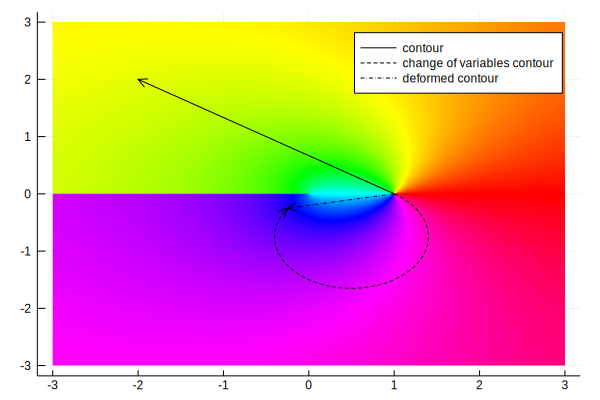

In [8]:
phaseplot(-3..3, -3..3, z -> log(z))
z = -2 + 2im

γ = (z,t) -> 1 + t*(z-1)
tt = range(0,stop=1,length=100)

plot!(real.(γ.(z,tt)), imag.(γ.(z,tt)); color=:black, label="contour", arrow=true)
plot!(real.(1 ./ γ.(z,tt)), imag.(1 ./ γ.(z,tt)); color=:black, linestyle=:dash, arrow=true, label="change of variables contour")
plot!(real.(γ.(1/z,tt)), imag.(γ.(1/z,tt)); color=:black, linestyle=:dashdot, arrow=true, label="deformed contour")

Here we see by looking at the phase plot that the two functions match:

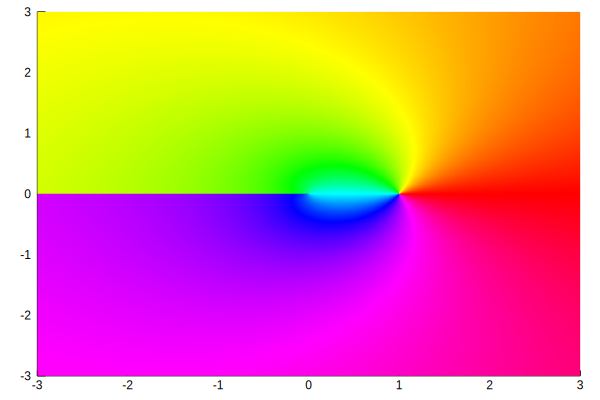

In [9]:
phaseplot(-3..3, -3..3, z -> -log(1/z))

## Algebraic powers


**Definition (algebraic power)** 
$$z^\alpha = e^{\alpha \log z}$$

Note, for example, when $\alpha = 1/2$, $\sqrt z \equiv z^{1/2}$ is only one solution to $y^2 = z$.

Here's a phase plot showing that $\sqrt{z}$ also has a branch cut on $(-\infty,0]$:

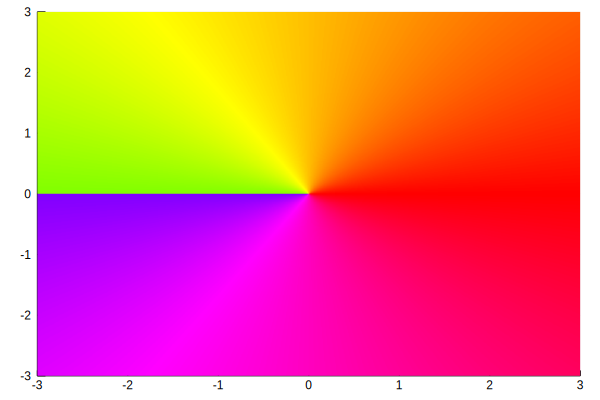

In [10]:
α = 0.5
phaseplot(-3..3, -3..3, z -> z^α)

On the branch cut  along $(-\infty,0]$ it has the jump:

$${x_+^\alpha \over x_-^\alpha} = e^{\alpha (\log_+ x - \log_- x)} = e^{2 \pi \I \alpha}$$

In particular,

$$\sqrt{x}_+ = -\sqrt{x}_- = i \sqrt{|x|}$$

In [11]:
sqrt(-1-0.0im) , -sqrt(-1 + 0.0im)

(0.0 - 1.0im, -0.0 - 1.0im)

These are _multiplicative jumps_. We also have a _subtractive jumps_:

\begin{align*}
x_+^\alpha - x_-^\alpha &= e^{\alpha \log_+ x} - e^{\alpha \log_- x} = e^{\alpha \log(-x) + \I  \pi \alpha} - e^{\alpha \log(-x) - \I \pi \alpha} \cr
    & = 2 \I (-x)^\alpha \sin \pi \alpha
\end{align*}

In [12]:
x = -2
(x+0.0im)^α - (x-0.0im)^α, 2im*(-x)^α*sin(π*α)

(0.0 + 2.8284271247461903im, 0.0 + 2.8284271247461903im)


and an _additive jump_:
\begin{align*}
x_+^\alpha + x_-^\alpha & = 2  (-x)^\alpha \cos \pi \alpha
\end{align*}

In [13]:
x = -1
(x+0.0im)^α + (-1-0.0im)^α, 2*(-x)^α*cos(π*α)

(0.0 + 0.0im, 1.2246467991473532e-16)

In particular, for $x < 0$,
\begin{align*}
\sqrt{x}_+ - \sqrt{x}_- &= 2 \I \sqrt{-x} \\
\sqrt{x}_+ + \sqrt{x}_- &= 0
\end{align*}

In [14]:
sqrt(x+0.0im) - sqrt(x-0.0im) == 2im*sqrt(-x)

true

In [15]:
sqrt(x+0.0im) + sqrt(x-0.0im)

0.0 + 0.0im

Let's look at another example: $\varphi(z) = \sqrt{z-1}\sqrt{z+1}$. 

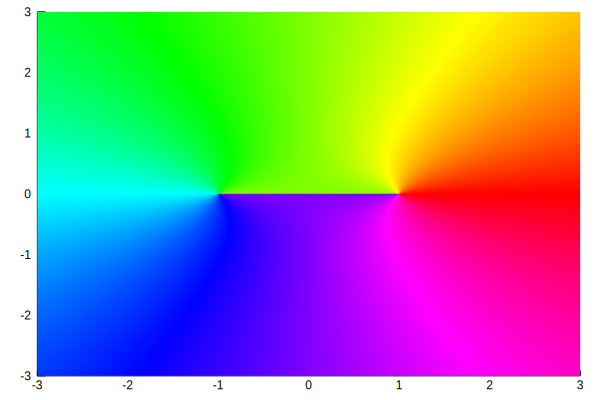

In [16]:
φ = z -> sqrt(z-1)*sqrt(z+1)
phaseplot(-3..3, -3..3, φ)

For $x > 0$ it's holomorphic. For $-1 < x < 1$ we have the multiplicative jump

$$\varphi_+(x) = \sqrt{x-1}_+ \sqrt{x+1} = - \sqrt{x-1}_- \sqrt{x+1} = -\varphi_-(x)$$
which gives the additive jump
$$
\varphi_+(x) + \varphi_-(x) = 0
$$

In [17]:
x = 0.1
φ(x + 0.0im) + φ(x - 0.0im)

0.0 + 0.0im

 But we also have a _subtractive jump_:
$$
\varphi_+(x) - \varphi_-(x) = (\sqrt{x-1}_+ - \sqrt{x-1}_-) \sqrt{x+1} = 2\I \sqrt{1-x}\sqrt{x+1} = 2\I \sqrt{1 - x^2}
$$

In [18]:
x = 0.1
φ(x + 0.0im) - φ(x - 0.0im), 2im*sqrt(1-x^2)

(0.0 + 1.98997487421324im, 0.0 + 1.98997487421324im)

For $x < -1$ we actually have continuity:

$$\varphi_+(x) = \sqrt{x-1}_+ \sqrt{x+1}_+ = (- \sqrt{x-1}_-)(- \sqrt{x+1}_-) = \varphi_-(x)$$

In [19]:
φ = z -> sqrt(z-1)sqrt(z+1)

x = -3.0
φ(x+0.0im), φ(x-0.0im)

(-2.8284271247461903 + 0.0im, -2.8284271247461903 - 0.0im)

# Inferred analyticity

But continuity _implies_ analyticity, using Cauchy's integral formula:

**Theorem (continuity on a curve implies analyticity)** Let $D$ be a domain and $\gamma \subset D$ a contour. Suppose $f$ is analytic in $D \backslash \gamma$, and continuous on the interior of $\gamma$. Then $f$ is analytic in $D \backslash \{\gamma(a), \gamma(b) \}$.

**Sketch of Proof** 

For simplicity, suppose $D$ is a circle of radius 2 and $\gamma$ is the interval $[-1,1]$.  For any $z$ off the interval, we can write 
$$
f(z) = {1 \over 2 \pi \I} \oint_{\Gamma_x} {f(\zeta) \over  \zeta - z} \D\zeta
$$
where $\Gamma_x$ is a simple closed contour that surrounds $z$ and passes through $x$ in both directions:

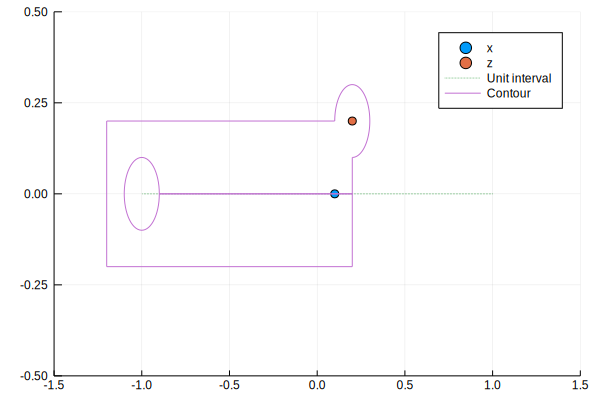

In [20]:
z = 0.2+0.2im
x = 0.1
ε = 0.001
scatter([x],[0.]; label="x", xlims=(-1.5,1.5), ylims=(-0.5,0.5))
scatter!([real(z)],[imag(z)]; label="z")
plot!(-1..1; label="Unit interval", linestyle=:dot)

Γₓ =  Arc(z, 0.1, (-π/2,π)) ∪ Segment(0.2+0.1im,0.2 +0.0im) ∪ Segment(0.2  +0.0im, -0.9 +0.0im) ∪
     Circle(-1.0, 0.1) ∪ Segment(-0.9 -0.0im, 0.2  -0.0im) ∪ Segment(0.2-0.0im, 0.2 - 0.2im) ∪
      Segment(0.2 - 0.2im, -1.2-0.2im) ∪ Segment(-1.2 -0.2im, -1.2+ 0.2im) ∪ 
        Segment(-1.2+ 0.2im, 0.1+0.2im)

plot!(Γₓ; label="Contour")

Because $f$ is continuous at $x$, we have
$$f_+(x) = f_-(x) = f(x)$$
where
$$f_\pm(x) = \lim_{\epsilon \rightarrow 0} f(x \pm \I \epsilon)
$$
Therefore, the two integrals along $[-1,1]$ cancel out and we get:
$$
    f(z) = {1 \over 2 \pi \I} \oint_{{\tilde \Gamma}_x} {f(\zeta) \over \zeta - z} \D \zeta
$$
where ${\tilde \Gamma}_x$ is $\Gamma_x$ with the contour on the interval removed:

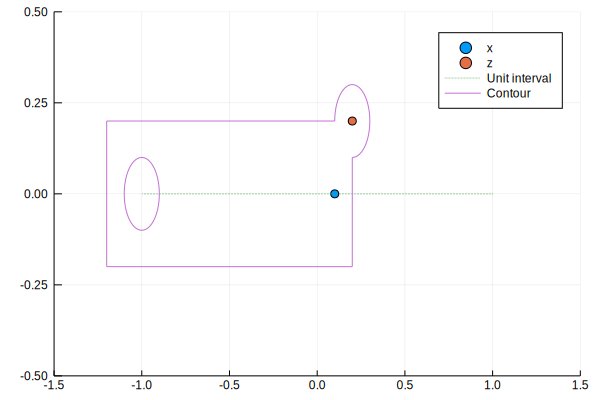

In [21]:
z = 0.2+0.2im
x = 0.1
ε = 0.001
scatter([x],[0.]; label="x", xlims=(-1.5,1.5), ylims=(-0.5,0.5))
scatter!([real(z)],[imag(z)]; label="z")
plot!(-1..1; label="Unit interval", linestyle=:dot)

Γ̃ₓ =  Arc(z, 0.1, (-π/2,π)) ∪ Segment(0.2+0.1im,0.2 -0.2im) ∪    Circle(-1.0, 0.1) ∪
      Segment(0.2 - 0.2im, -1.2-0.2im) ∪ Segment(-1.2 -0.2im, -1.2+ 0.2im) ∪ 
        Segment(-1.2+ 0.2im, 0.1+0.2im)

plot!(Γ̃ₓ; label="Contour")

This integral expression holds for all $z$ inside the contour $\tilde \Gamma_x$ but off the interval.  But it therefore holds true for $f(x) = f_+(x) = f_-(x)$ by taking limits.  Thus
$$f(x) = {1 \over 2 \pi \I} \int_{{\tilde \Gamma}_x} {f(\zeta) \over \zeta -x} \D\zeta$$
hence $f$ is analytic at $x$.

⬛️

**Theorem (weaker than pole singularity implies analyticity)** Suppose $f$ is analytic in $D \backslash \{ z_0 \}$ and has a weaker than pole singularity at $z_0$:
$$\lim_{z \rightarrow z_0} (z-z_0) f(z) = 0$$
holds uniformly. Then $f$ is analytic at $z_0$. (More precisely: $f$ can be analytically continued to $z_0$.)

**Proof** 

Around $z_0$ is an annulus $A_{R0}$ inside which $f$ is analytic. Consider $z$ in $A_{R0}$ and a positively oriented circle $\gamma_r$ of radius $r$ with $|r| < |z-z_0|$.  Then we have
$$
    f(z) = {1 \over 2 \pi \I} \oint_{\gamma_R} {f(\zeta) \over \zeta - z} \D \zeta - {1 \over 2 \pi \I} \oint_{\gamma_r} {f(\zeta) \over \zeta - z} \D \zeta .
$$
here's a plot:

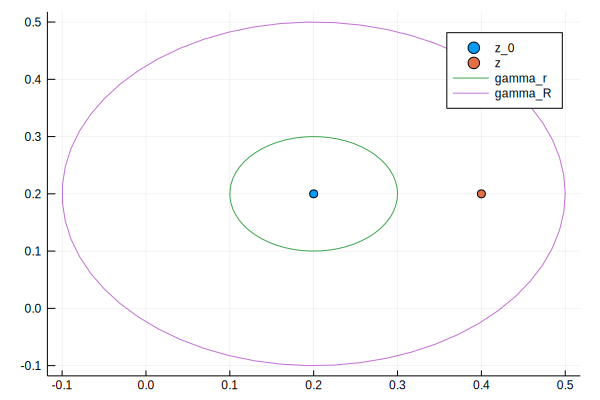

In [22]:
z₀ = 0.2 +0.2im
z = 0.4 +0.2im

scatter([real(z₀)],[imag(z₀)]; label="z_0")
scatter!([real(z)],[imag(z)]; label="z")
plot!(Circle(z₀, 0.1); label="gamma_r")
plot!(Circle(z₀, 0.3); label="gamma_R")

But we have
$$
    \left|  \oint_{\gamma_r} {f(\zeta) \over \zeta - z} \D \zeta \right| \leq 2\pi r \sup_{\zeta \in \gamma_r} \left|{f(\zeta) \over \zeta - z}\right| \leq 2 \pi  {1 \over |z_0-z| - r} \sup_{\zeta \in \gamma_r} |f(\zeta)|
$$
which tends to zero as $r \rightarrow 0$.

⬛️


**Corollary (Weaker than linear growth implies analyticity at infinity)** If 
$$
\lim_{z \rightarrow \infty} {f(z)  \over z} = 0,
$$ then $f$ is analytic at infinity.


From these result we can infer that 
$$\phi(z) = \sqrt{z-1}\sqrt{z+1}$$
is analytic on $\C \backslash [-1,1]$, and $\phi(z) \sim_{z \rightarrow \infty} z$.


### Uniqueness results from inferred singularity

Recall that an important ingredient of complex analysis is Liouville's theorem:

**Theorem (Liouville)** If $f$ is entire and  bounded in ${\mathbb C}$, then $f$ must be constant.


We will see that knowledge of the behaviour of $\phi$ can be used to recover by its behaviour at its singularities at $\infty$ and jump on $[-1,1]$. But before that, we already have the following uniqueness results by combining the above with Liouville's theorem:


1. $\phi(z)$ is the unique function analytic in $\C \backslash [-1,1]$ with weaker than pole singularities at $\pm 1$ satisfying $\phi(z) \sim z$ and 
$$\phi_+(x) - \phi_-(x) = 2\I \sqrt{1-x^2} \qqfor -1 < x <1.$$ 
2. $\kappa(z) = {1 \over \sqrt{z-1} \sqrt{z+1}}$ is the unique function analytic in $\bar\C \backslash [-1,1]$ with weaker than pole singularities at $\pm 1$ satisfying $\kappa(\infty) = 0$ and 
$$
\kappa_+(x) - \kappa_-(x) = {-2\I \over \sqrt{1-x^2}}\qqfor -1 < x <1.
$$

_Demonstration_ From the phase plot we see it has a branch cut on $[-1,1]$:

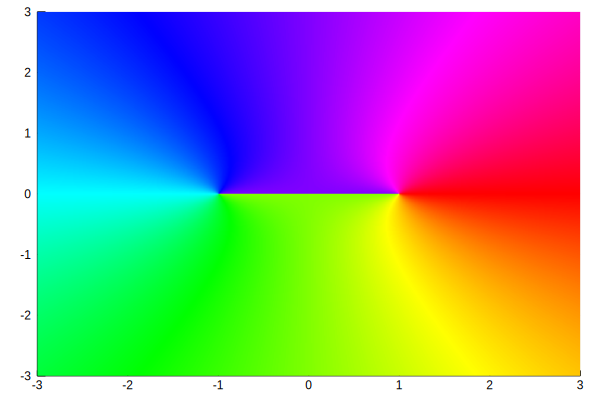

In [23]:
κ = z -> 1/(sqrt(z-1)sqrt(z+1))
phaseplot(-3..3, -3..3, κ)

On the branch there is the expected jump:

In [24]:
x = 0.1
κ(x + 0.0im) - κ(x - 0.0im) , -2im/sqrt(1-x^2)

(0.0 - 2.010075630518424im, 0.0 - 2.010075630518424im)

For $x < -1$ the branch cut is removable: we have continuity and therefore analyticity:

In [25]:
x = -2.3
κ(x + 0.0im) - κ(x - 0.0im) 

0.0 - 0.0im

3\. $\mu(z) = {\log(z -1) - \log(z+1) \over 2 \pi \I}$ is the unique function analytic in $\C \backslash [-1,1]$ with weaker than pole singularities at $\pm 1$ satisfying $\mu(\infty) = 0$ and 
$$\mu_+(x) - \mu_-(x) = 1 \qqfor -1 < x < 1.$$

_Demonstration_ Here we see from the phase plot of $mu$ that it has a branch cut on $[-1,1]$:

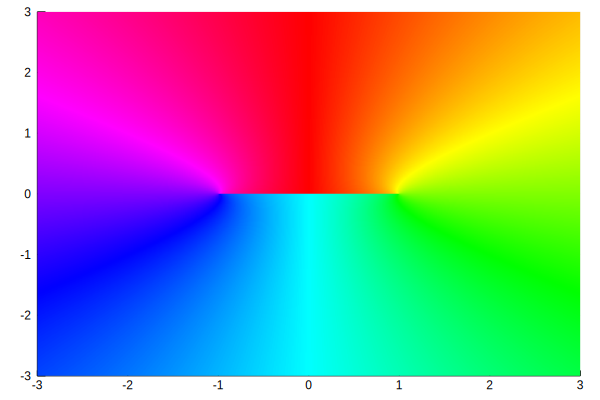

In [26]:
μ = z -> (log(z-1) - log(z+1))/(2π*im)
phaseplot(-3..3, -3..3, μ)

For $-1 < x < 1$ we have the jump $1$:

In [27]:
x = 0.3
μ(x + 0.0im) - μ(x - 0.0im) 

1.0 + 0.0im

For $x < -1$ we see that the branch cuts cancel and we have continuity:

In [28]:
x = -4.3
μ(x + 0.0im) - μ(x - 0.0im) 

0.0 + 0.0im